In [1]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [3]:
model = fasterrcnn_resnet50_fpn_v2(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:00<00:00, 219MB/s]


In [4]:
num_classes = 11  # For example, 2 classes (background and your object)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [5]:
# Import Necessary Libraries
import zipfile
import os
import matplotlib.pyplot as plt
import shutil
import pandas as pd
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import classification_report

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
kaggle_doodle_df = pd.read_csv("/content/drive/MyDrive/Capstone/master_doodle_dataframe.csv")
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,data/traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,data/traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,data/traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,data/traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,data/traffic light/5572841187573760.png


In [8]:
kaggle_doodle_df['image_path'] = kaggle_doodle_df['image_path'].str.replace('data/', '')
kaggle_doodle_df.head()

NameError: name 'kaggle_doodle_df' is not defined

In [9]:
words_to_keep = ['helicopter', 'campfire', 'circle', 'triangle','skull', 'tree', 'house', 'mountain', 'cloud','hospital']

In [10]:
data_subset = kaggle_doodle_df[kaggle_doodle_df['word'].isin(words_to_keep)]

In [32]:
data_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path,box,x_min
63000,US,"[[[111, 84, 64, 4, 0, 167, 220, 240, 255, 241,...",6.521511e+15,True,9.0,triangle/6521510929891328.png,[],NaN
63001,US,"[[[3, 2, 8, 27, 51, 91, 100, 144, 144, 113, 42...",4.801273e+15,True,9.0,triangle/4801272714625024.png,[],NaN
63002,US,"[[[70, 38, 15, 0, 48, 106, 222, 159, 120, 71, ...",5.759395e+15,True,9.0,triangle/5759395092758528.png,[],NaN
63003,BR,"[[[8, 27, 50, 96, 106, 94, 80, 0], [97, 68, 6,...",6.362393e+15,True,9.0,triangle/6362393414205440.png,[],NaN
63004,US,"[[[0, 220, 255, 240, 164, 123, 105, 41, 0], [1...",6.359347e+15,True,9.0,triangle/6359347464503296.png,[],NaN


In [8]:
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
categ = le.fit_transform(data_subset['word'])
data_subset['word'] = categ
data_subset.head()

NameError: name 'data_subset' is not defined

In [ ]:
train_csv = data_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn.csv', index=False)

In [13]:
data_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path
63000,US,"[[[111, 84, 64, 4, 0, 167, 220, 240, 255, 241,...",6521510929891328,True,9,triangle/6521510929891328.png
63001,US,"[[[3, 2, 8, 27, 51, 91, 100, 144, 144, 113, 42...",4801272714625024,True,9,triangle/4801272714625024.png
63002,US,"[[[70, 38, 15, 0, 48, 106, 222, 159, 120, 71, ...",5759395092758528,True,9,triangle/5759395092758528.png
63003,BR,"[[[8, 27, 50, 96, 106, 94, 80, 0], [97, 68, 6,...",6362393414205440,True,9,triangle/6362393414205440.png
63004,US,"[[[0, 220, 255, 240, 164, 123, 105, 41, 0], [1...",6359347464503296,True,9,triangle/6359347464503296.png


In [9]:
pip install albumentations

In [9]:
def get_doodle_box(image_array):
  mask = image_array < 255

  coords = ng.argwhere(mask)
  if coords.size == 0:
    return [0, 0, 0, 0]

  y_min, x_min = coords.min(axis=0)
  y_max, x_max = coords.max(axis=0)
  return[int(x_min), int(y_min), int(x_max), int(y_max)]

In [10]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

def get_doodle_box(image_array):

  mask = image_array < 255
  if mask.ndim == 3:  # RGB
      mask = mask.any(axis=2)

  coords = np.argwhere(mask)
  if coords.size == 0:
    return 0, 0, 0, 0

  y_min, x_min = coords.min(axis=0)
  y_max, x_max = coords.max(axis=0)
  return [int(x_min), int(y_min), int(x_max), int(y_max)]

In [11]:
# show image with box function
def display_image_with_doodle_box(image_path):
  image = cv2.imread(image_path)
  image_array = np.array(image)
  box = get_doodle_box(image_array)

  x_min, y_min, x_max, y_max = box
  cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  plt.axis('off')
  plt.show()


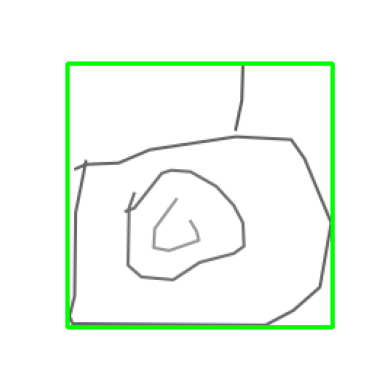

In [20]:
image_path = "/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/camera/4508811211571200.png"  # Store the path in a variable

display_image_with_doodle_box(image_path)




In [36]:
from alive_progress import alive_bar
import cv2
import numpy as np
from tqdm import tqdm
import time


# Initialize the 'box' column with empty lists
boxes = []

num_items = data_subset.shape[0]

for i in tqdm(range(num_items), desc="Processing"):
    if i < len(boxes):
      continue
    item_path = data_subset.iloc[i]['image_path']

    if not isinstance(item_path, str):
        item_path = str(item_path)
    image_path = '/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/' + item_path
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        boxes.append([0, 0, 0, 0])
        continue
    image_array = np.array(image)
    x_min, y_min, x_max, y_max = get_doodle_box(image_array)

    # Proper way to set a list as a DataFrame cell value
    #data_subset.loc[i, 'box'] = [x_min, y_min, x_max, y_max]
    boxes.append([x_min, y_min, x_max, y_max])

    bar()

data_subset['box'] = boxes
saved_subset = data_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn_boxes.csv', index=False)


Processing: 100%|██████████| 30003/30003 [00:00<00:00, 2393975.25it/s]


Error loading image: /content/drive/MyDrive/Capstone/kaggle_doodles/doodle/nan
Error loading image: /content/drive/MyDrive/Capstone/kaggle_doodles/doodle/nan
Error loading image: /content/drive/MyDrive/Capstone/kaggle_doodles/doodle/nan


In [12]:
saved_subset = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn_boxes.csv')
saved_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path,box,x_min
0,US,"[[[111, 84, 64, 4, 0, 167, 220, 240, 255, 241,...",6.521511e+15,True,9.0,triangle/6521510929891328.png,"[39, 37, 221, 218]",NaN
1,US,"[[[3, 2, 8, 27, 51, 91, 100, 144, 144, 113, 42...",4.801273e+15,True,9.0,triangle/4801272714625024.png,"[39, 37, 221, 218]",NaN
2,US,"[[[70, 38, 15, 0, 48, 106, 222, 159, 120, 71, ...",5.759395e+15,True,9.0,triangle/5759395092758528.png,"[39, 37, 221, 218]",NaN
3,BR,"[[[8, 27, 50, 96, 106, 94, 80, 0], [97, 68, 6,...",6.362393e+15,True,9.0,triangle/6362393414205440.png,"[39, 37, 221, 218]",NaN
4,US,"[[[0, 220, 255, 240, 164, 123, 105, 41, 0], [1...",6.359347e+15,True,9.0,triangle/6359347464503296.png,"[39, 37, 221, 218]",NaN


In [13]:
saved_subset.drop('x_min', axis=1, inplace=True)

In [22]:
saved_subset.tail()

,countrycode,drawing,key_id,recognized,word,image_path,box
29995,FI,"[[[0, 24, 32, 54, 68, 126, 158, 162, 167, 195,...",5.178580e+15,True,6.0,mountain/5178579987988480.png,"[39, 37, 221, 218]"
29996,FR,"[[[0, 12, 28, 57, 81, 92, 102, 117, 147, 174, ...",6.289590e+15,True,6.0,mountain/6289589725560832.png,"[39, 37, 221, 217]"
29997,GB,"[[[0, 57, 96, 119, 130, 140, 200, 218, 243, 25...",5.627926e+15,True,6.0,mountain/5627925720203264.png,"[39, 37, 221, 218]"
29998,US,"[[[0, 13, 27, 61, 81, 94, 105, 124, 145, 166, ...",5.559417e+15,True,6.0,mountain/5559417317621760.png,"[39, 37, 221, 218]"
29999,SE,"[[[0, 0, 7, 23, 66, 77, 117, 136, 156, 167, 17...",5.821334e+15,True,6.0,mountain/5821333889875968.png,"[39, 37, 221, 218]"


In [21]:
# remove last 3 rows
saved_subset = saved_subset[:-3]

In [24]:
saved_subset = saved_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn_boxes.csv', index=False)
saved_subset = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn_boxes.csv')
saved_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path,box
0,US,"[[[111, 84, 64, 4, 0, 167, 220, 240, 255, 241,...",6.521511e+15,True,9.0,triangle/6521510929891328.png,"[39, 37, 221, 218]"
1,US,"[[[3, 2, 8, 27, 51, 91, 100, 144, 144, 113, 42...",4.801273e+15,True,9.0,triangle/4801272714625024.png,"[39, 37, 221, 218]"
2,US,"[[[70, 38, 15, 0, 48, 106, 222, 159, 120, 71, ...",5.759395e+15,True,9.0,triangle/5759395092758528.png,"[39, 37, 221, 218]"
3,BR,"[[[8, 27, 50, 96, 106, 94, 80, 0], [97, 68, 6,...",6.362393e+15,True,9.0,triangle/6362393414205440.png,"[39, 37, 221, 218]"
4,US,"[[[0, 220, 255, 240, 164, 123, 105, 41, 0], [1...",6.359347e+15,True,9.0,triangle/6359347464503296.png,"[39, 37, 221, 218]"


In [43]:
import ast

print(saved_subset.iloc[0]['box'])
box_data = np.array(ast.literal_eval(saved_subset.iloc[0]['box']), dtype=np.float64)
print(box_data)
print(type(box_data))

[39, 37, 221, 218]
[ 39.  37. 221. 218.]
<class 'numpy.ndarray'>


In [ ]:
data_subset['box'] = data_subset['box'] = [[] for _ in range(len(data_subset))]

for item, row in data_subset.iterrows():
  image_path = '/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/' + row['image_path']
  image = cv2.imread(image_path)
  image_array = np.array(image)
  x_min, y_min, x_max, y_max = get_doodle_box(image_array)
  data_subset.at[item, 'box'] = [x_min, y_min, x_max, y_max]

train_csv = data_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_fasterrcnn_boxes.csv', index=False)



TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [66]:
train, val = train_test_split(saved_subset, test_size=0.4, random_state=33, shuffle=True)

In [68]:
train_only = train.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/trainonly_fasterrcnn_boxes.csv', index=False)
test_only = val.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/testonly_fasterrcnn_boxes.csv', index=False)

In [13]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

def get_transform(train=True):
    if train:
        return A.Compose([
            A.PadIfNeeded(min_height=1024, min_width=1024, border_mode=0, value=255),
            #A.RandomCrop(width=512, height=512),
            A.AtLeastOneBBoxRandomCrop(width=512, height=512, erosion_factor=0.0),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5, border_mode=0, value=255),
            A.Normalize(mean=(0.5,), std=(0.5,)),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
    else:
        return A.Compose([
            A.PadIfNeeded(min_height=512, min_width=512, border_mode=0, value=255),
            A.CenterCrop(height=512, width=512),
            A.Normalize(mean=(0.5,), std=(0.5,)),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))


In [40]:
saved_subset.box.dtype

dtype('O')

In [11]:



from torch.utils.data import Dataset
import torch
import pandas as pd
import os
import numpy as np
from PIL import Image
import ast

class DoodleDetectionDataset(Dataset):
    def __init__(self, annotations_file, image_root_dir, transforms=None):
        self.annotations = pd.read_csv(annotations_file)
        self.image_root_dir = image_root_dir
        self.transforms = transforms
        self.image_ids = self.annotations['image_path'].unique()

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        records = self.annotations[self.annotations['image_path'] == image_id]
        img_path = os.path.join(self.image_root_dir, records.iloc[0]['image_path'])
        image = Image.open(img_path).convert("RGB")
        image = np.array(image)

        boxes = []
        labels = []

        for _, row in records.iterrows():
            label = int(row['word'])  # Or adjust if this is categorical
            box = row['box']
            if isinstance(box, str):
                box = ast.literal_eval(box)
            boxes.append(box)
            labels.append(label)

        # Albumentations expects boxes as list of [x_min, y_min, x_max, y_max] floats
        if self.transforms:
            transformed = self.transforms(image=image, bboxes=boxes, labels=labels)
            image = transformed['image']
            boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
            labels = torch.tensor(transformed['labels'], dtype=torch.int64)
        else:
            image = torch.tensor(image / 255.0, dtype=torch.float32).permute(2, 0, 1)
            boxes = torch.tensor(boxes, dtype=torch.float32)
            labels = torch.tensor(labels, dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([idx])
        }

        return image, target



In [15]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = DoodleDetectionDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/trainonly_fasterrcnn_boxes.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/",
    transforms=get_transform(train=True)
)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)



<ipython-input-13-5a2012f1db9f>:7: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=1024, min_width=1024, border_mode=0, value=255),
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-13-5a2012f1db9f>:11: UserWarning: Argument(s) 'value' are not valid for transform ShiftScaleRotate
  A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5, border_mode=0, value=255),


In [74]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer and LR scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

num_epochs = 10

# Tracking
epoch_losses = []
epoch_accuracies = []  # Only if you compute validation accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, targets in dataloader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        running_loss += losses.item()
    torch.save(model.state_dict(), f"/content/drive/MyDrive/Capstone/fasterrcnn_trained_model{epoch+1}.pth")

    lr_scheduler.step()

    avg_loss = running_loss / len(dataloader)
    epoch_losses.append(avg_loss)

    print(f"Epoch: {epoch+1}/{num_epochs}, Avg Loss: {avg_loss:.4f}")

    # Optional: compute validation accuracy here
    # acc = evaluate(model, val_dataloader, device)
    # epoch_accuracies.append(acc)
    # print(f"Validation Accuracy: {acc:.4f}")

# Save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/Capstone/fasterrcnn_trained_model.pth')
print("Training complete!")

# Save loss curve to CSV
import pandas as pd

training_metrics = pd.DataFrame({
    'epoch': list(range(1, num_epochs + 1)),
    'loss': epoch_losses,
    # 'accuracy': epoch_accuracies  # Uncomment if you compute accuracy
})

training_metrics.to_csv('/content/drive/MyDrive/Capstone/fasterrcnn_training_metrics.csv', index=False)
print("Loss (and accuracy) history saved to CSV.")


Epoch: 1/10, Avg Loss: 0.0095
Epoch: 2/10, Avg Loss: 0.0081
Epoch: 3/10, Avg Loss: 0.0075
Epoch: 4/10, Avg Loss: 0.0061
Epoch: 5/10, Avg Loss: 0.0059
Epoch: 6/10, Avg Loss: 0.0056
Epoch: 7/10, Avg Loss: 0.0056


KeyboardInterrupt: 

In [75]:
# Save loss curve to CSV
import pandas as pd

training_metrics = pd.DataFrame({
    'epoch': list(range(1, num_epochs + 1)),
    'loss': epoch_losses,
    # 'accuracy': epoch_accuracies  # Uncomment if you compute accuracy
})

training_metrics.to_csv('/content/drive/MyDrive/Capstone/fasterrcnn_training_metrics.csv', index=False)
print("Loss (and accuracy) history saved to CSV.")

ValueError: All arrays must be of the same length

In [18]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Load the trained model
model.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/fasterrcnn_trained_model5.pth'))
model.eval()

# Create a validation dataset and dataloader
val_dataset = DoodleDetectionDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/testonly_fasterrcnn_boxes.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/",
    transforms=get_transform(train=False)
)

val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


# Generate predictions on validation data
predictions = []
ground_truth = []

with torch.no_grad():
  for images, targets in val_dataloader:
    images = list(img.to(device) for img in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    outputs = model(images)

    # Store predictions and ground truths for later evaluation
    predictions.extend(outputs)
    ground_truth.extend(targets)

# Process the predictions and evaluate your model
# (e.g., calculate mAP, precision, recall, etc.)
# Note that the predictions may contain bounding boxes and class scores
# You'll need to use a suitable evaluation metric based on your task
# and the format of your predictions and ground truth data.


<ipython-input-13-5a2012f1db9f>:17: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=512, min_width=512, border_mode=0, value=255),


KeyboardInterrupt: 

In [22]:
print(predictions[0])
print(ground_truth[0])
print(predictions[1])
print(ground_truth[1])
print(predictions[2])
print(ground_truth[2])
print(predictions[3])
print(ground_truth[3])
print(predictions[4])
print(ground_truth[4])

{'boxes': tensor([[168.1809, 166.4953, 349.2744, 346.8951]], device='cuda:0'), 'labels': tensor([7], device='cuda:0'), 'scores': tensor([0.9997], device='cuda:0')}
{'boxes': tensor([[168., 166., 350., 347.]], device='cuda:0'), 'labels': tensor([7], device='cuda:0'), 'image_id': tensor([0], device='cuda:0')}
{'boxes': tensor([[167.3604, 165.8761, 348.7120, 347.8343]], device='cuda:0'), 'labels': tensor([7], device='cuda:0'), 'scores': tensor([0.9993], device='cuda:0')}
{'boxes': tensor([[168., 166., 350., 347.]], device='cuda:0'), 'labels': tensor([7], device='cuda:0'), 'image_id': tensor([1], device='cuda:0')}
{'boxes': tensor([[168.8982, 166.5658, 351.2543, 347.9587]], device='cuda:0'), 'labels': tensor([5], device='cuda:0'), 'scores': tensor([0.9996], device='cuda:0')}
{'boxes': tensor([[168., 166., 350., 347.]], device='cuda:0'), 'labels': tensor([5], device='cuda:0'), 'image_id': tensor([2], device='cuda:0')}
{'boxes': tensor([[169.3037, 165.8527, 350.2182, 348.9460],
        [167.

In [36]:
from PIL import Image
import torchvision.transforms as T
import torch

# Replace with your image path
image_path = "/content/drive/MyDrive/Capstone/2.png"


# Load image
image = Image.open(image_path).convert("RGB")
def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    return T.Compose(transforms)
transform = T.ToTensor()
image_tensor = transform(image)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.eval()

image_tensor = image_tensor.to(device)
with torch.no_grad():
    new_pred = model([image_tensor])  # Model expects a list of images


In [37]:
print(new_pred)

[{'boxes': tensor([[121.0848,  19.6722, 231.6468, 138.9513],
        [ 30.8752,  23.3156, 224.8548, 221.5674]], device='cuda:0'), 'labels': tensor([4, 4], device='cuda:0'), 'scores': tensor([0.9986, 0.9704], device='cuda:0')}]


In [38]:
box = new_pred[0]['boxes']
lab = new_pred[0]['labels']
scores = new_pred[0]['scores']

# Print top 5 predictions
for i in range(min(5, len(box))):
    print(f"Label: {lab[i].item()}, Score: {scores[i].item():.2f}, Box: {box[i].tolist()}")


Label: 4, Score: 1.00, Box: [121.08480072021484, 19.67218589782715, 231.6468048095703, 138.95126342773438]
Label: 4, Score: 0.97, Box: [30.87521743774414, 23.315582275390625, 224.85484313964844, 221.56739807128906]


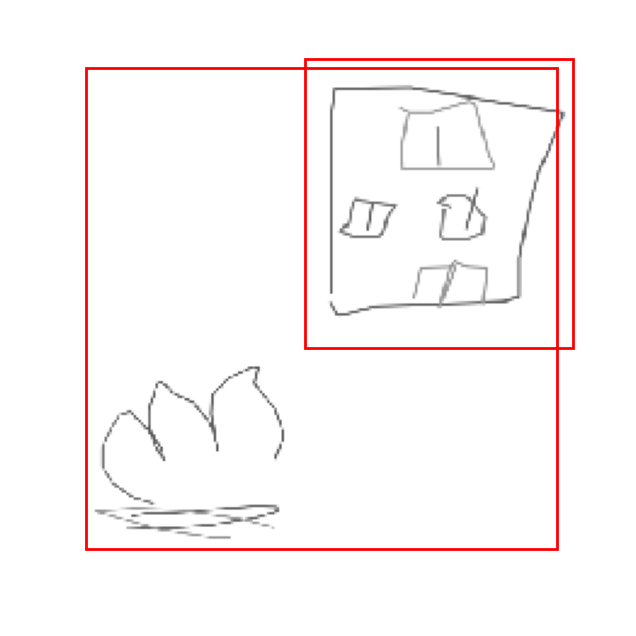

In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
ax = plt.gca()

# Draw top N boxes with confidence > 0.5
for b, score in zip(box, scores):
    if score > 0.5:
        x1, y1, x2, y2 = b.tolist()
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
plt.axis('off')
plt.show()


NameError: name 'predictions' is not defined

In [78]:
import pandas as pd

# Create a DataFrame to store predictions
prediction_df = pd.DataFrame(columns=['image_id', 'predicted_boxes', 'predicted_labels', 'predicted_scores'])

for i, output in enumerate(predictions):
  for box, label, score in zip(output[0]['boxes'].cpu().numpy(), output[0]['labels'].cpu().numpy(), output[0]['scores'].cpu().numpy()):
    prediction_df = pd.concat([prediction_df, pd.DataFrame({'image_id': [i], 'predicted_boxes': [box.tolist()], 'predicted_labels': [label.tolist()], 'predicted_scores': [score.tolist()]})], ignore_index=True)

# Create a DataFrame to store ground truth
ground_truth_df = pd.DataFrame(columns=['image_id', 'ground_truth_boxes', 'ground_truth_labels'])

for i, target in enumerate(ground_truth):
  ground_truth_df = pd.concat([ground_truth_df, pd.DataFrame({'image_id': [i], 'ground_truth_boxes': [target['boxes'].cpu().numpy().tolist()], 'ground_truth_labels': [target['labels'].cpu().numpy().tolist()]})], ignore_index=True)

# Save the DataFrames to CSV files in your Google Drive
prediction_df.to_csv('/content/drive/MyDrive/Capstone/predictions.csv', index=False)
ground_truth_df.to_csv('/content/drive/MyDrive/Capstone/ground_truth.csv', index=False)

print("Predictions and ground truth saved to CSV files.")


KeyError: 0